Load Visium
----
Load visum data from spaceranger output.

Visium images information: 

- 1 visium slide, 4 images:
    - A: AD temporal cortex
    - B: AD visual cortex
    - C: Control temporal Cortex
    - D Control visual cortex
- brightfield images from H&E staining

reference:refdata-gex-GRCh38-2020-A

Spaceranger version: spaceranger-2.1.1


## Dependecy notebooks

Requires spaceranger output.

Spaceranger run with: `spaceranger count --id=V1_AD1_human_$AREA --transcriptome=$PATH_TO_REFERENCE_GTF --fastqs=$PATH_TO_FASTQ_FILES --image="{$AREA}{$PATH_TO_TIF}"/$TIF_NAME --slide V11D13-028 --area "{$AREA}1" --sample CACTACGA_ATCAGTCT_$AREA` for area (A1, B1, C1, D1)

## Import packages

If you want modules to be automatically reloaded when you call them, use `autoreload`:

In [30]:
%load_ext autoreload
%autoreload2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


UsageError: Line magic function `%autoreload2` not found.


Import packages

In [31]:
# import standard packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys
import anndata as ad

# import single-cell packages
import scanpy as sc
import squidpy as sq
#import scanorama

# set verbosity levels
sc.settings.verbosity = 2

from pathlib import Path

## Print package versions for reproducibility

If you want to exactly reproduce the results shown here, please make sure that your package versions match what is printed below. 

In [32]:
#sc.logging.print_versions()

## Set up paths

In [33]:
sys.path.insert(0, "../")  # this depends on the notebook depth and must be adapted per notebook

VISIUM_DATA = '/lustre/groups/ml01/projects/2023_ad_jaekel/human_visium/'
from paths import DATA_DIR, RESULTS_DIR, FIG_DIR
from colors import AREA_COLOR, CELL_TYPES_COLOR, CONDITION_COLOR

FIG_DIR = str(Path(FIG_DIR, 'visium'))

sc.settings.figdir = str(FIG_DIR)

Define global paths.

In [34]:
sys.path.insert(0, "../")  # this depends on the notebook depth and must be adapted per notebook

spaceranger_out_path = '/Users/francesca.drummer/Documents/jaekel/data/AD1_spaceranger'

Set up the paths to save figures.

In [35]:
#sc.settings.figdir = str(FIG_DIR)
#scv.settings.figdir = str(FIG_DIR)
#cr.settings.figdir = str(FIG_DIR)

## Set global parameters

Set some plotting parameters.

In [36]:
plt.rcParams['figure.dpi'] = 90
plt.rcParams['savefig.dpi'] = 300 # If 'figure', uses the figure's dpi value.
SMALL_SIZE = 17
MEDIUM_SIZE = 19
BIGGER_SIZE = 21
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [84]:
IMAGES = ['A1', 'B1', 'C1', 'D1']

If there are other global parameters for this analysis, put them here as well. 

## Load visium data

Any utility functions you may need in this notebook go here. 

In [17]:
adatas = []
for image in IMAGES:
    print(image)
    adata = sq.read.visium(path = os.path.join(spaceranger_out_path, f'outs_{image}'),
                        counts_file = 'filtered_feature_bc_matrix.h5', 
                        library_id = image)
    print(adata)
    adata.write_h5ad(os.path.join(spaceranger_out_path, f'adata_spaceranger/outs_{image}.h5ad'))
    adatas.append(adata)

A1
reading /Users/francesca.drummer/Documents/jaekel/data/AD1_spaceranger/outs_A1/filtered_feature_bc_matrix.h5
 (0:00:00)
AnnData object with n_obs × n_vars = 4048 × 36601
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'
B1
reading /Users/francesca.drummer/Documents/jaekel/data/AD1_spaceranger/outs_B1/filtered_feature_bc_matrix.h5


/Users/francesca.drummer/miniconda3/envs/spatial/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/francesca.drummer/miniconda3/envs/spatial/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:00)
AnnData object with n_obs × n_vars = 4303 × 36601
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'
C1
reading /Users/francesca.drummer/Documents/jaekel/data/AD1_spaceranger/outs_C1/filtered_feature_bc_matrix.h5


/Users/francesca.drummer/miniconda3/envs/spatial/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/francesca.drummer/miniconda3/envs/spatial/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:00)


/Users/francesca.drummer/miniconda3/envs/spatial/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/francesca.drummer/miniconda3/envs/spatial/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 4490 × 36601
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'
D1
reading /Users/francesca.drummer/Documents/jaekel/data/AD1_spaceranger/outs_D1/filtered_feature_bc_matrix.h5
 (0:00:00)


/Users/francesca.drummer/miniconda3/envs/spatial/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/francesca.drummer/miniconda3/envs/spatial/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 4328 × 36601
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'


## Load seperate slides (adata)

In [88]:
adatas = []
for image in IMAGES:
    adata = ad.read_h5ad(os.path.join(VISIUM_DATA, f'adata/outs_{image}.h5ad'))
    adatas.append(adata)

/ictstr01/groups/ml01/workspace/francesca.drummer/mamba/envs/spatial/lib/python3.9/site-packages/anndata/_core/anndata.py:1900: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/ictstr01/groups/ml01/workspace/francesca.drummer/mamba/envs/spatial/lib/python3.9/site-packages/anndata/_core/anndata.py:1900: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/ictstr01/groups/ml01/workspace/francesca.drummer/mamba/envs/spatial/lib/python3.9/site-packages/anndata/_core/anndata.py:1900: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/ictstr01/groups/ml01/workspace/francesca.drummer/mamba/envs/spatial/lib/python3.9/site-packages/anndata/_core/anndata.py:1900: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_un

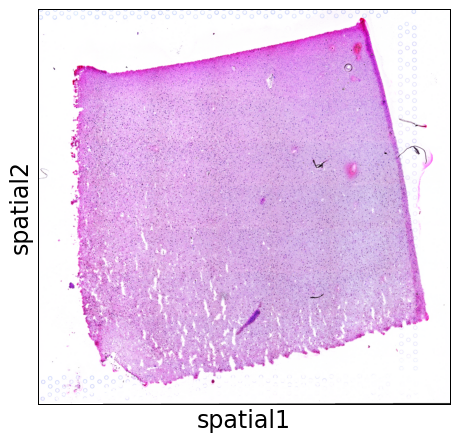

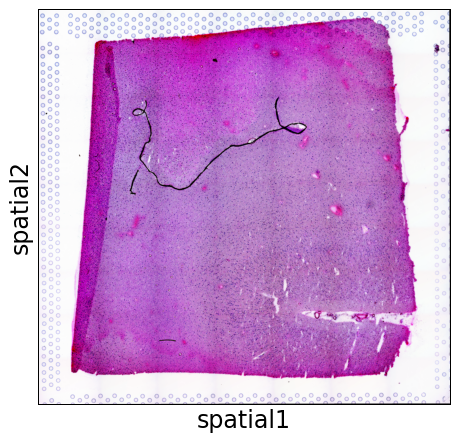

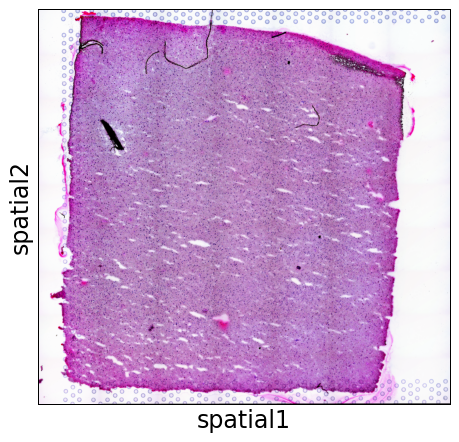

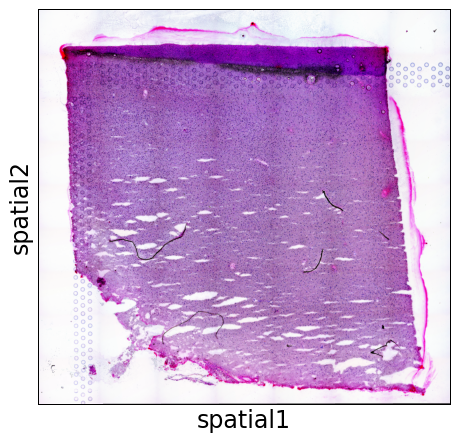

In [22]:
for adata, img in zip(adatas, IMAGES):
    sq.pl.spatial_scatter(adata, 
                         save = f'{FIG_DIR}/Visium_HE_{img}.png')

In [89]:
for adata, img in zip(adatas, IMAGES):
    print(img)
    adata.obs_names = adata.obs_names + f"_{img}"
    adata.obs['image'] = img
    adata.var_names_make_unique()

A1
B1
C1
D1


In [90]:
adata = ad.concat(adatas, axis = 0, join = "inner", uns_merge = "unique")

In [91]:
adata.obs['image']

AAACAAGTATCTCCCA-1_A1    A1
AAACAATCTACTAGCA-1_A1    A1
AAACACCAATAACTGC-1_A1    A1
AAACAGAGCGACTCCT-1_A1    A1
AAACAGGGTCTATATT-1_A1    A1
                         ..
TTGTTGTGTGTCAAGA-1_D1    D1
TTGTTTCACATCCAGG-1_D1    D1
TTGTTTCATTAGTCTA-1_D1    D1
TTGTTTCCATACAACT-1_D1    D1
TTGTTTGTGTAAATTC-1_D1    D1
Name: image, Length: 17169, dtype: object

In [92]:
adata.write(f'{VISIUM_DATA}/adata/adata.h5ad')

## Load concatinated slides

In [8]:
adata = sc.read_h5ad('/lustre/groups/ml01/projects/2023_ad_jaekel/human_visium/adata/adata_spatial.h5ad')
adata

AnnData object with n_obs × n_vars = 17169 × 36601
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'library_id'
    uns: 'hvg', 'log1p', 'spatial'
    obsm: 'X_scanorama', 'spatial'

In [17]:
adata.var["mt"] = adata.var_names.str.startswith("MT-")
mt_gene_index = np.where(adata.var["mt"])[0]
adata.obs['mt_fraction'] = np.array(adata.X[:, mt_gene_index].sum(axis=1)) / np.array(adata.X.sum(axis=1))

/tmp/ipykernel_317884/3930968377.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Leave space for the colorbar


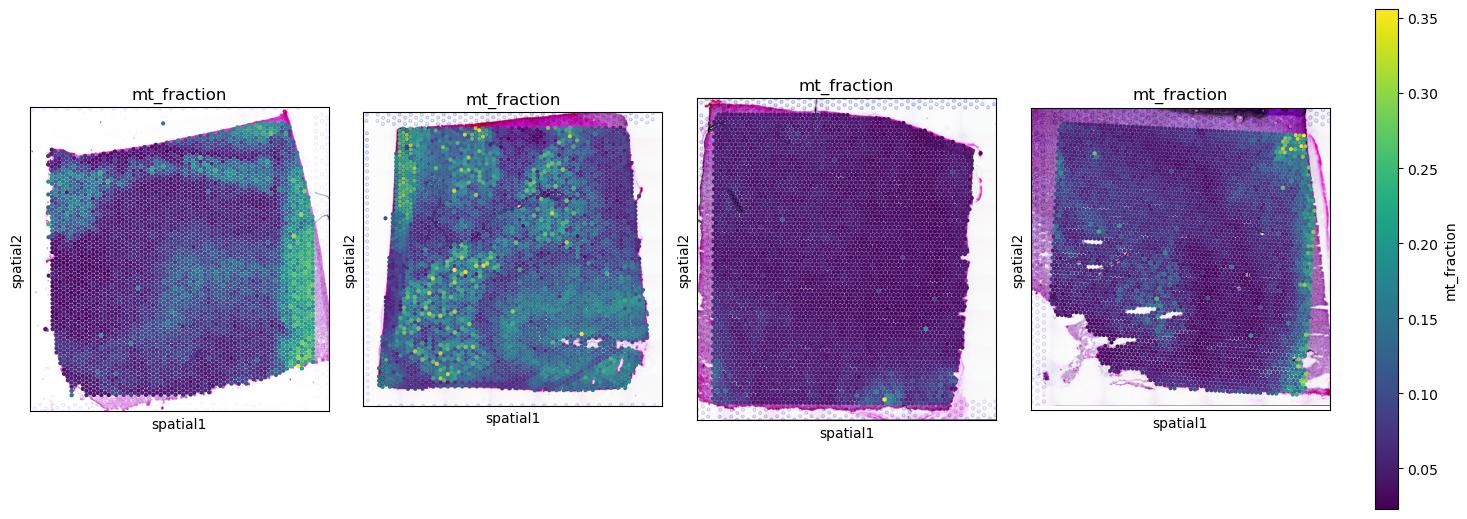

In [26]:
import matplotlib.pyplot as plt
import scanpy as sc

fig, axs = plt.subplots(1, 4, figsize=(15, 10))

for i, library in enumerate(IMAGES):
    ad = adata[adata.obs.library_id == library, :].copy()
    sc.pl.spatial(
        ad,
        img_key="hires",
        library_id=library,
        color="mt_fraction",
        size=1.5,
        legend_loc=None,
        show=False,
        ax=axs[i],
        colorbar_loc = None
    )

# Add a shared colorbar
# First plot again on a dummy axis to get the colormap
import matplotlib.cm as cm
import matplotlib.colorbar as cbar
import matplotlib.colors as mcolors
import numpy as np

# Normalize across all plots
vmin = adata.obs["mt_fraction"].min()
vmax = adata.obs["mt_fraction"].max()
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
cmap = cm.viridis  # Or whatever Scanpy is using

cax = fig.add_axes([0.92, 0.25, 0.015, 0.5])  # [left, bottom, width, height]
cb = cbar.ColorbarBase(cax, cmap=cmap, norm=norm)
cb.set_label("mt_fraction")

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Leave space for the colorbar

In [4]:
adata.obs['library_id']

NameError: name 'adata' is not defined

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(15, 10))

for i, library in enumerate(IMAGES):
    ad = adata_spatial[adata_spatial.obs.library_id == library, :].copy()
    sc.pl.spatial(
        ad,
        img_key="hires",
        library_id=library,
        color="clusters",
        size=1.5,
        palette=[
            v
            for k, v in clusters_colors.items()
            if k in ad.obs.clusters.unique().tolist()
        ],
        legend_loc=None,
        show=False,
        ax=axs[i],
    )

plt.tight_layout()

In [9]:
for adata in adatas:
    adata.var_names_make_unique()
    sc.pp.calculate_qc_metrics(adata, inplace=True)

<ipython-input-10-23ce3dd1e703>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(adata.obs["total_counts"], kde=False, ax=axs[0])
<ipython-input-10-23ce3dd1e703>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(adata.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[1])


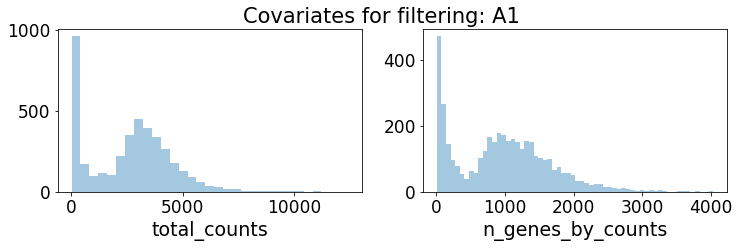

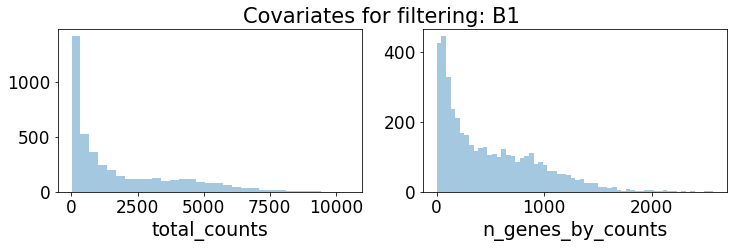

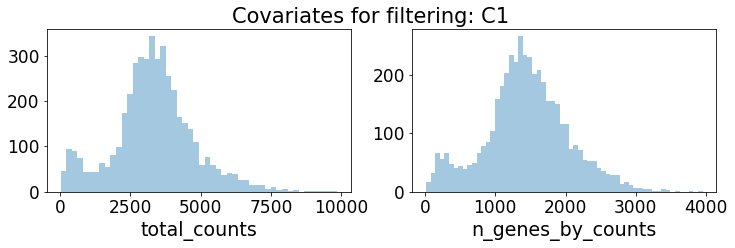

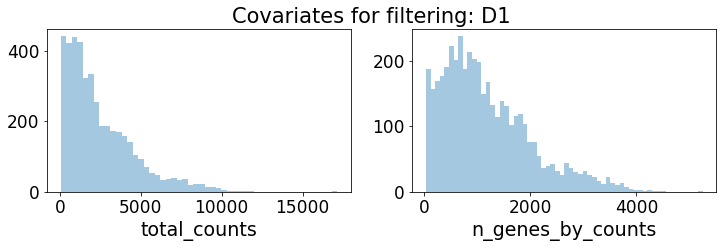

In [10]:
for name, adata in zip(IMAGES, adatas):
    fig, axs = plt.subplots(1, 2, figsize=(12, 3))
    fig.suptitle(f"Covariates for filtering: {name}")

    sns.distplot(adata.obs["total_counts"], kde=False, ax=axs[0])
    sns.distplot(adata.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[1])

- lot of empty spots for A1 and B1

In [11]:
for adata in adatas:
    sc.pp.normalize_total(adata, inplace=True)
    sc.pp.log1p(adata)
    sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000, inplace=True)

normalizing counts per cell
    finished (0:00:00)
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes


/Users/francesca.drummer/miniconda3/envs/spatial/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)


/Users/francesca.drummer/miniconda3/envs/spatial/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes


/Users/francesca.drummer/miniconda3/envs/spatial/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


    finished (0:00:00)


/Users/francesca.drummer/miniconda3/envs/spatial/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


## Data integration

https://scanpy-tutorials.readthedocs.io/en/latest/spatial/integration-scanorama.html

In [12]:
adatas_cor = scanorama.correct_scanpy(adatas, return_dimred=True)

Found 36601 genes among all datasets
[[0.         0.42877063 0.18173719 0.14602588]
 [0.         0.         0.06623286 0.16825471]
 [0.         0.         0.         0.37915896]
 [0.         0.         0.         0.        ]]
Processing datasets (0, 1)
Processing datasets (2, 3)
Processing datasets (0, 2)
Processing datasets (1, 3)
Processing datasets (0, 3)


In [18]:
len(adatas_cor)

4

In [19]:
adata_spatial = sc.concat(
    adatas_cor,
    label="library_id",
    uns_merge="unique",
    keys=[
        k
        for d in [
            adatas_cor[0].uns["spatial"],
            adatas_cor[1].uns["spatial"],
            adatas_cor[2].uns["spatial"],
            adatas_cor[3].uns["spatial"]
        ]
        for k, v in d.items()
    ],
    index_unique="-",
)

In [21]:
adata_spatial.write_h5ad(os.path.join(spaceranger_out_path, f'adata_spaceranger/adata_spatial_{image}.h5ad'))

In [13]:
adata_spatial = sc.read_h5ad(os.path.join(spaceranger_out_path, f'adata_spaceranger/adata_spatial.h5ad'))

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/Users/francesca.drummer/Documents/jaekel/data/AD1_spaceranger/adata_spaceranger/adata_spatial.h5ad', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [14]:
adata_spatial

NameError: name 'adata_spatial' is not defined

In [9]:
sc.pp.neighbors(adata_spatial, use_rep="X_scanorama")
sc.tl.umap(adata_spatial)
sc.tl.leiden(adata_spatial, key_added="clusters")

computing neighbors


/Users/francesca.drummer/miniconda3/envs/spatial/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


    finished (0:00:08)
computing UMAP
    finished (0:00:06)
running Leiden clustering
    finished (0:00:01)


/Users/francesca.drummer/miniconda3/envs/spatial/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/francesca.drummer/miniconda3/envs/spatial/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


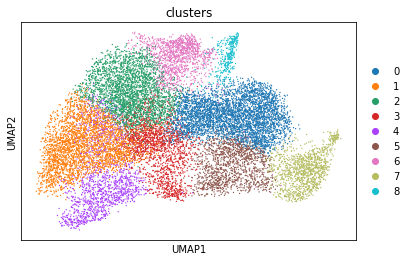

In [10]:
sc.pl.umap(
    adata_spatial, color=["clusters"], palette=sc.pl.palettes.default_20
)

/Users/francesca.drummer/miniconda3/envs/spatial/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/francesca.drummer/miniconda3/envs/spatial/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


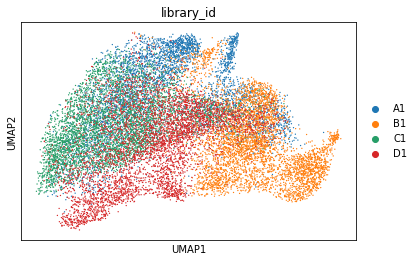

In [13]:
sc.pl.umap(
    adata_spatial, color=["library_id"], palette=sc.pl.palettes.default_20
)

In [24]:
clusters_colors = dict(
    zip([str(i) for i in range(18)], adata_spatial.uns["clusters_colors"])
)

/Users/francesca.drummer/miniconda3/envs/spatial/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/francesca.drummer/miniconda3/envs/spatial/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/francesca.drummer/miniconda3/envs/spatial/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for t

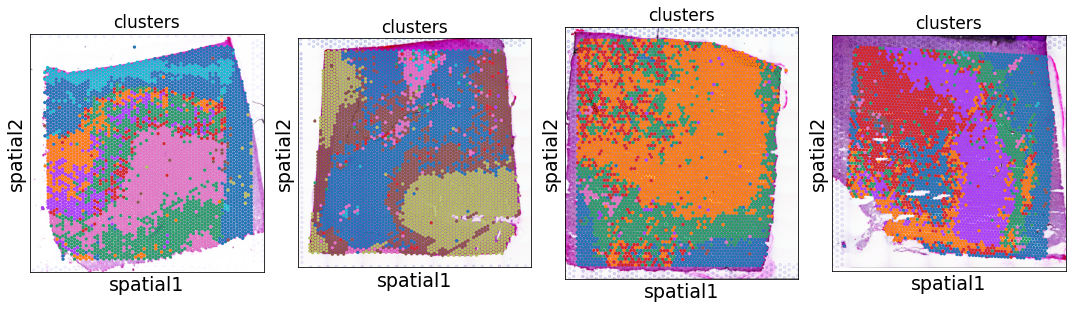

In [25]:
fig, axs = plt.subplots(1, 4, figsize=(15, 10))

for i, library in enumerate(IMAGES):
    ad = adata_spatial[adata_spatial.obs.library_id == library, :].copy()
    sc.pl.spatial(
        ad,
        img_key="hires",
        library_id=library,
        color="clusters",
        size=1.5,
        palette=[
            v
            for k, v in clusters_colors.items()
            if k in ad.obs.clusters.unique().tolist()
        ],
        legend_loc=None,
        show=False,
        ax=axs[i],
    )

plt.tight_layout()

AnnData object with n_obs × n_vars = 17169 × 36601
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'library_id', 'clusters'
    uns: 'spatial', 'log1p', 'hvg', 'neighbors', 'umap', 'leiden', 'clusters_colors', 'library_id_colors'
    obsm: 'spatial', 'X_scanorama', 'X_umap'
    obsp: 'distances', 'connectivities'